# Analysis of collected data

In [29]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
land = pd.read_csv('..\csv_files\land.csv',engine="python")
land.head()

,Country_name,1990_sq_km_thousands_forest_area,2016_sq_km_thousands_forest_area,2018_threatened_mammals,2018_threatened_birds,2018_threatened_fishes,2018_higher_plants,prot_perc_2015,prot_perc_2016,prot_perc_2017,prot_perc_2018,prot_perc_2019,prot_perc_2020
0,Argentina,348,268,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39
1,Armenia,3,3,9,14,3,74,24.11,24.11,24.11,24.11,24.11,24.11
2,Australia,"1,285","1,251",63,52,125,108,18.14,18.85,19.10,19.20,19.20,19.20
3,Austria,38,39,3,13,11,17,27.97,28.45,28.45,28.54,28.54,28.54
4,Belarus,78,87,4,9,2,1,9.73,9.73,9.73,9.73,9.73,9.73


In [49]:
land.columns

Index(['Country_name', '1990_sq_km_thousands_forest_area',
       '2016_sq_km_thousands_forest_area', '2018_threatened_mammals',
       '2018_threatened_birds', '2018_threatened_fishes', '2018_higher_plants',
       'prot_perc_2015', 'prot_perc_2016', 'prot_perc_2017', 'prot_perc_2018',
       'prot_perc_2019', 'prot_perc_2020'],
      dtype='object')

In [3]:
animals = pd.read_csv('..\csv_files\combined_animals_table.csv',engine="python") 
animals.head()

,Species,CommonName_new,Status,Locality
0,parvidens,Utah Prairie Dog,Threatened,"Guyana, East Demerara-West Coast Berbice, ""Hyd..."
1,cynocephalus,Tasmanian Tiger,Endangered,"Australia, Tasmania."
2,fasciatus,Numbat,Endangered,"Australia, Western Australia, Mt. Kokeby, sout..."
3,fasciatus,Banded Hare Wallaby,Endangered,"Australia, Western Australia, Mt. Kokeby, sout..."
4,viverrinus,Eastern Native-Cat,Endangered,"Australia, New South Wales, Sydney."


Add new column that extracts just the country name from the 'Locality' column

In [4]:
animals['Country']=animals['Locality'].str.extract('^([^,]*)')

animals

,Species,CommonName_new,Status,Locality,Country
0,parvidens,Utah Prairie Dog,Threatened,"Guyana, East Demerara-West Coast Berbice, ""Hyd...",Guyana
1,cynocephalus,Tasmanian Tiger,Endangered,"Australia, Tasmania.",Australia
2,fasciatus,Numbat,Endangered,"Australia, Western Australia, Mt. Kokeby, sout...",Australia
3,fasciatus,Banded Hare Wallaby,Endangered,"Australia, Western Australia, Mt. Kokeby, sout...",Australia
4,viverrinus,Eastern Native-Cat,Endangered,"Australia, New South Wales, Sydney.",Australia
...,...,...,...,...,...
472,truncatus,Pink Fairy Armadillo,Endangered,"UK, England, Devonshire, ""in Duncannon Pool, n...",UK
473,leucas,Beluga [Cook Inlet Dps] Whale,Endangered,"NE Siberia, ""die im Obischen Meerbusen"" (= mou...",NE Siberia
474,sinus,"Gulf Of California Harbor (Cochito, Vaquita) ...",Endangered,"""from the northeast shore of Punta San Felipe,...","""from the northeast shore of Punta San Felipe"
475,vexillifer,Chinese River Dolphin,Endangered,"""Tung Ting Lake, about 600 miles up the Yangtz...","""Tung Ting Lake"


Merge 'land' and 'animals' dataframes

In [5]:
merging=land.merge(animals, left_on='Country_name', right_on='Country')

merging

,Country_name,1990_sq_km_thousands_forest_area,2016_sq_km_thousands_forest_area,2018_threatened_mammals,2018_threatened_birds,2018_threatened_fishes,2018_higher_plants,prot_perc_2015,prot_perc_2016,prot_perc_2017,prot_perc_2018,prot_perc_2019,prot_perc_2020,Species,CommonName_new,Status,Locality,Country
0,Argentina,348,268,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,Endangered,"Argentina, Entre Ros Prov., 32.5S latitude alo...",Argentina
1,Argentina,348,268,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,XN,"Argentina, Entre Ros Prov., 32.5S latitude alo...",Argentina
2,Argentina,348,268,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,auritus,Large-Eared Hutia,Endangered,"Argentina, Buenos Aires Prov., pampas south of...",Argentina
3,Argentina,348,268,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered,"Argentina, Pategonia, vicinity of the lower pa...",Argentina
4,Argentina,348,268,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered,"Argentina, Buenos Aires Prov.",Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,South Africa,92,92,30,54,121,153,7.77,8.05,8.09,8.34,8.39,8.39,shortridgei,Shortridge'S Mouse,Endangered,"South Africa, Western Cape Province, Louisvale...",South Africa
158,Sweden,281,281,1,11,15,5,13.71,13.79,13.97,14.18,14.20,14.20,musculus,Blue Whale,Endangered,"Sweden, Uppsala County, Uppsala.",Sweden
159,Sweden,281,281,1,11,15,5,13.71,13.79,13.97,14.18,14.20,14.20,robustus,Gray [Western North Pacific Dps] Whale,Endangered,"Sweden, ""p Grsn i Roslagen""; ""Benen lgo 840 fo...",Sweden
160,Switzerland,12,13,3,9,9,4,10.03,10.04,10.26,10.27,10.27,10.27,nivalis,Mexican Long-Nosed Bat,Endangered,"Switzerland, Berner Oberland, Faulhorn.",Switzerland


Make copy of merged dataframe

In [6]:
df_environmental = merging.copy()

In [7]:
df_environmental.columns

Index(['Country_name', '1990_sq_km_thousands_forest_area',
       '2016_sq_km_thousands_forest_area', '2018_threatened_mammals',
       '2018_threatened_birds', '2018_threatened_fishes', '2018_higher_plants',
       'prot_perc_2015', 'prot_perc_2016', 'prot_perc_2017', 'prot_perc_2018',
       'prot_perc_2019', 'prot_perc_2020', 'Species', 'CommonName_new',
       'Status', 'Locality', 'Country'],
      dtype='object')

Drop unwanted columns

In [8]:
list_drop= ['2018_threatened_birds', '2018_threatened_fishes', '2018_higher_plants', 'Locality', 'Country']

In [9]:
df_environmental = df_environmental.drop(axis = 1, columns = list_drop)

In [10]:
df_environmental.head()

,Country_name,1990_sq_km_thousands_forest_area,2016_sq_km_thousands_forest_area,2018_threatened_mammals,prot_perc_2015,prot_perc_2016,prot_perc_2017,prot_perc_2018,prot_perc_2019,prot_perc_2020,Species,CommonName_new,Status
0,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,Endangered
1,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,XN
2,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,auritus,Large-Eared Hutia,Endangered
3,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered
4,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered


## Analysis and plotting of animal data

In [11]:
count_status = df_environmental.assign(Status_count = df_environmental['Status'] )

In [12]:
count_status

,Country_name,1990_sq_km_thousands_forest_area,2016_sq_km_thousands_forest_area,2018_threatened_mammals,prot_perc_2015,prot_perc_2016,prot_perc_2017,prot_perc_2018,prot_perc_2019,prot_perc_2020,Species,CommonName_new,Status,Status_count
0,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,Endangered,Endangered
1,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,XN,XN
2,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,auritus,Large-Eared Hutia,Endangered,Endangered
3,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered,Endangered
4,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered,Endangered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,South Africa,92,92,30,7.77,8.05,8.09,8.34,8.39,8.39,shortridgei,Shortridge'S Mouse,Endangered,Endangered
158,Sweden,281,281,1,13.71,13.79,13.97,14.18,14.20,14.20,musculus,Blue Whale,Endangered,Endangered
159,Sweden,281,281,1,13.71,13.79,13.97,14.18,14.20,14.20,robustus,Gray [Western North Pacific Dps] Whale,Endangered,Endangered
160,Switzerland,12,13,3,10.03,10.04,10.26,10.27,10.27,10.27,nivalis,Mexican Long-Nosed Bat,Endangered,Endangered


Group by 'Country-name' and then 'Status' to get a count of species status within each country

In [20]:
yo = count_status.groupby(['Country_name', 'Status'], as_index = False).agg({ 'Status_count': 'count'})
yo.sort_values(by='Status_count', ascending = False)

,Country_name,Status,Status_count
2,Australia,Endangered,53
5,Brazil,Endangered,25
19,Indonesia,Endangered,20
11,China,Endangered,11
23,Mexico,Endangered,7
3,Australia,Threatened,5
0,Argentina,Endangered,4
26,Peru,Endangered,3
8,Canada,Threatened,3
20,Indonesia,Threatened,3


In [31]:
count_country=df_environmental.groupby(['Country_name'], as_index = False).agg({ 'Status': 'count'})
count_country=count_country.sort_values(by='Status', ascending = False)

Plot the number of endangered species per country

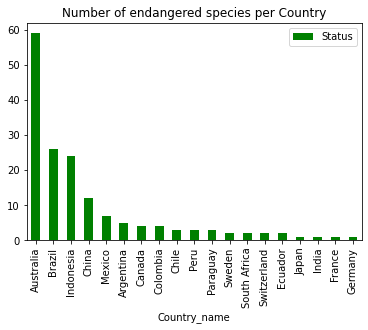

In [35]:
count_country.plot.bar(x='Country_name', color= 'green', title = 'Number of endangered species per Country')

## Analysis and plotting of deforestation data 

In [38]:
df_environmental.head()

,Country_name,1990_sq_km_thousands_forest_area,2016_sq_km_thousands_forest_area,2018_threatened_mammals,prot_perc_2015,prot_perc_2016,prot_perc_2017,prot_perc_2018,prot_perc_2019,prot_perc_2020,Species,CommonName_new,Status
0,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,Endangered
1,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,XN
2,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,auritus,Large-Eared Hutia,Endangered
3,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered
4,Argentina,348,268,38,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered


In [48]:
df_forest = land.copy()

Drop unwanted columns

In [51]:
to_drop = ['1990_sq_km_thousands_forest_area','2016_sq_km_thousands_forest_area', '2018_threatened_mammals',
           '2018_threatened_birds', '2018_threatened_fishes', '2018_higher_plants']

In [52]:
df_forest=df_forest.drop(to_drop, axis=1)

In [53]:
df_forest.head()

,Country_name,prot_perc_2015,prot_perc_2016,prot_perc_2017,prot_perc_2018,prot_perc_2019,prot_perc_2020
0,Argentina,8.27,8.29,8.33,8.39,8.39,8.39
1,Armenia,24.11,24.11,24.11,24.11,24.11,24.11
2,Australia,18.14,18.85,19.10,19.20,19.20,19.20
3,Austria,27.97,28.45,28.45,28.54,28.54,28.54
4,Belarus,9.73,9.73,9.73,9.73,9.73,9.73


In [46]:
df_forest = df_forest.groupby(['Country_name'], as_index = False).agg()

In [47]:
df_forest

### AT THIS POINT WE RAN OUT OF TIME, SOMETHING TO WORK ON IN THE FUTURE...

In [22]:
#count_status = count_status.assign(total_per_country = count_status['Status'])

In [25]:
#count_status['total_per_country'] = (count_status['total_per_country']
              #                       .groupby(['Country_name'])
               #                      .agg({'total_per_country' : 'count'}))

KeyError: 'Country_name'

In [14]:
#frequency country name for plotting - represents frequency of endangered species the way its build
#most endangerous species and its common name?
#maybe check which countries lost area between 1990 and 2016 and add as a column?

In [15]:
merging['1990_sq_km_thousands_forest_area']=pd.to_numeric(merging['1990_sq_km_thousands_forest_area'], errors='coerce')

In [16]:
merging['2016_sq_km_thousands_forest_area']=pd.to_numeric(merging['2016_sq_km_thousands_forest_area'], errors='coerce')
merging

,Country_name,1990_sq_km_thousands_forest_area,2016_sq_km_thousands_forest_area,2018_threatened_mammals,2018_threatened_birds,2018_threatened_fishes,2018_higher_plants,prot_perc_2015,prot_perc_2016,prot_perc_2017,prot_perc_2018,prot_perc_2019,prot_perc_2020,Species,CommonName_new,Status,Locality,Country
0,Argentina,348.0,268.0,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,Endangered,"Argentina, Entre Ros Prov., 32.5S latitude alo...",Argentina
1,Argentina,348.0,268.0,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,rufus,Red Wolf,XN,"Argentina, Entre Ros Prov., 32.5S latitude alo...",Argentina
2,Argentina,348.0,268.0,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,auritus,Large-Eared Hutia,Endangered,"Argentina, Buenos Aires Prov., pampas south of...",Argentina
3,Argentina,348.0,268.0,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered,"Argentina, Pategonia, vicinity of the lower pa...",Argentina
4,Argentina,348.0,268.0,38,52,42,70,8.27,8.29,8.33,8.39,8.39,8.39,australis,Southern Right Whale,Endangered,"Argentina, Buenos Aires Prov.",Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,South Africa,92.0,92.0,30,54,121,153,7.77,8.05,8.09,8.34,8.39,8.39,shortridgei,Shortridge'S Mouse,Endangered,"South Africa, Western Cape Province, Louisvale...",South Africa
158,Sweden,281.0,281.0,1,11,15,5,13.71,13.79,13.97,14.18,14.20,14.20,musculus,Blue Whale,Endangered,"Sweden, Uppsala County, Uppsala.",Sweden
159,Sweden,281.0,281.0,1,11,15,5,13.71,13.79,13.97,14.18,14.20,14.20,robustus,Gray [Western North Pacific Dps] Whale,Endangered,"Sweden, ""p Grsn i Roslagen""; ""Benen lgo 840 fo...",Sweden
160,Switzerland,12.0,13.0,3,9,9,4,10.03,10.04,10.26,10.27,10.27,10.27,nivalis,Mexican Long-Nosed Bat,Endangered,"Switzerland, Berner Oberland, Faulhorn.",Switzerland


In [17]:
#comparing

subtract=merging['2016_sq_km_thousands_forest_area'] - merging['1990_sq_km_thousands_forest_area']
subtract

0     -80.0
1     -80.0
2     -80.0
3     -80.0
4     -80.0
       ... 
157     0.0
158     0.0
159     0.0
160     1.0
161     1.0
Length: 162, dtype: float64